## Environment Analysis

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from matplotlib.pyplot import figure


pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_columns', None)

In [2]:
# Loading Data
echrb_env_comprehensive = pd.read_csv('Data/ECHRdb_Comprehensive_ENV_AR_CA.xlsx - Sheet1.csv')
echrb_env_comprehensive = echrb_env_comprehensive[echrb_env_comprehensive['ENV'] == 1]
len(echrb_env_comprehensive)

158

In [3]:
echrb_env_comprehensive.head()


,Unnamed: 0,conclusions,casetitle,case,app,joinedapp,ENV,dtejmt,dtelgd,date,impt,country1,country2,country3,country4,country5,country6,country7,judgment,art2,art3,art4,art5,art6,art7,art8,art9,art10,art11,art12,art13,art14,art17,art18,art25,art34,art38,art46,p1a1,p1a2,p1a3,p4a2,p4a3,p4a4,p6a1,p7a1,p7a2,p7a3,p7a4,p7a5,p12a1,partid1,partid2,partid3,partid4,partid5,partid6,partid7,partid8,partid9,partid10,partid11,partid12,partid13,partid14,partid15,partid16,partid17,partid18,partid19,partid20,partid21,partid22,partid23,partid24,partid25,partid26,partid27,partid28,partid29,partid30,partid31,partid32,partid33,partid34,partid35,partid36,partid37,partid38,partid39,partid40,partid41,partid42,partid43,partid44,partid45,partid46,partid47,inttype1,inttype2,inttype3,inttype4,inttype5,inttype6,inttype7,inttype8,inttype9,inttype10,inttype11,inttype12,inttype13,inttype14,inttype15,inttype16,inttype17,inttype18,inttype19,inttype20,inttype21,inttype22,inttype23,inttype24,inttype25,inttype26,inttype27,inttype28,inttype29,inttype30,inttype31,inttype32,inttype33,inttype34,inttype35,inttype36,inttype37,inttype38,inttype39,inttype40,inttype41,inttype42,inttype43,inttype44,inttype45,inttype46,inttype47,partmode1,partmode2,partmode3,partmode4,partmode5,partmode6,partmode7,partmode8,partmode9,partmode10,partmode11,partmode12,partmode13,partmode14,partmode15,partmode16,partmode17,partmode18,partmode19,partmode20,partmode21,partmode22,partmode23,partmode24,partmode25,partmode26,partmode27,partmode28,partmode29,partmode30,partmode31,partmode32,partmode33,partmode34,partmode35,partmode36,partmode37,partmode38,partmode39,partmode40,partmode41,partmode42,partmode43,partmode44,partmode45,partmode46,partmode47,summ1,summ2,summ3,summ4,summ5,summ6,summ7,summ8,summ9,summ10,summ11,summ12,summ13,summ14,summ15,summ16,summ17,summ18,summ19,summ20,summ21,summ22,engapp1,engapp2,engapp3,engapp4,engapp5,engapp6,engapp7,engapp8,engapp9,engapp10,engapp11,engapp12,engapp13,engapp14,engapp15,engapp16,engapp17,engapp18,engapp19,engapp20,engapp21,engapp22,engstate1,engstate2,engstate3,engstate4,engstate5,engstate6,engstate7,engstate8,engstate9,engstate10,engstate11,engstate12,engstate13,engstate14,engstate15,engstate16,engstate17,engstate18,engstate19,engstate20,engstate21,engstate22,engcourt1,engcourt2,engcourt3,engcourt4,engcourt5,engcourt6,engcourt7,engcourt8,engcourt9,engcourt10,engcourt11,engcourt12,engcourt13,engcourt14,engcourt15,engcourt16,engcourt17,engcourt18,engcourt19,engcourt20,engcourt21,engcourt22,engdiss1,engdiss2,engdiss3,engdiss4,engdiss5,engdiss6,engdiss7,engdiss8,engdiss9,engdiss10,engdiss11,engdiss12,engdiss13,engdiss14,engdiss15,engdiss16,engdiss17,engdiss18,engdiss19,engdiss20,engdiss21,engdiss22,engcon1,engcon2,engcon3,engcon4,engcon5,engcon6,engcon7,engcon8,engcon9,engcon10,engcon11,engcon12,engcon13,engcon14,engcon15,engcon16,engcon17,engcon18,engcon19,engcon20,engcon21,engcon22,suptpi1,suptpi2,suptpi3,suptpi4,suptpi5,suptpi6,suptpi7,suptpi8,suptpi9,suptpi10,suptpi11,suptpi12,suptpi13,suptpi14,suptpi15,suptpi16,suptpi17,suptpi18,suptpi19,suptpi20,suptpi21,suptpi22,apptpi,statetpi,othertpi,Document Type
0,10654,Violation of Article 1 of Protocol No. 1 - Pro...,CASE OF CIN AND OTHERS v. TURKEY,305,305/03,305/03,1.0,2009,2003,10/11/2009,3,20,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Court (Second Section)
1,8465,Prelimina

In [6]:
count = -1
for columns in echrb_env_comprehensive:
    count += 1
    print(count, columns)

0 Unnamed: 0
1 conclusions
2 casetitle
3 case
4 app
5 joinedapp
6 ENV
7 dtejmt
8 dtelgd
9 date
10 impt
11 country1
12 country2
13 country3
14 country4
15 country5
16 country6
17 country7
18 judgment
19 art2
20 art3
21 art4
22 art5
23 art6
24 art7
25 art8
26 art9
27 art10
28 art11
29 art12
30 art13
31 art14
32 art17
33 art18
34 art25
35 art34
36 art38
37 art46
38 p1a1
39 p1a2
40 p1a3
41 p4a2
42 p4a3
43 p4a4
44 p6a1
45 p7a1
46 p7a2
47 p7a3
48 p7a4
49 p7a5
50 p12a1
51 partid1
52 partid2
53 partid3
54 partid4
55 partid5
56 partid6
57 partid7
58 partid8
59 partid9
60 partid10
61 partid11
62 partid12
63 partid13
64 partid14
65 partid15
66 partid16
67 partid17
68 partid18
69 partid19
70 partid20
71 partid21
72 partid22
73 partid23
74 partid24
75 partid25
76 partid26
77 partid27
78 partid28
79 partid29
80 partid30
81 partid31
82 partid32
83 partid33
84 partid34
85 partid35
86 partid36
87 partid37
88 partid38
89 partid39
90 partid40
91 partid41
92 partid42
93 partid43
94 partid44
95 partid45
96

In [22]:
article_violations = echrb_env_comprehensive.columns[19:38]
print(article_violations)

Index(['art2', 'art3', 'art4', 'art5', 'art6', 'art7', 'art8', 'art9', 'art10',
       'art11', 'art12', 'art13', 'art14', 'art17', 'art18', 'art25', 'art34',
       'art38', 'art46'],
      dtype='object')


In [23]:
echrb_env_violations = echrb_env_comprehensive.iloc[:, 0:38]

In [24]:
country_dict = {
    1: 'Austria', 2: 'Belgium', 3: 'Switzerland', 4: 'Cyprus', 5: 'Germany', 6: 'Denmark', 7: 'Spain',
    8: 'France', 9: 'Greece', 10: 'Italy', 11: 'Ireland', 12: 'Iceland', 13: 'Luxemburg', 14: 'Malta',
    15: 'Norway', 16: 'Netherlands', 17: 'Portugal', 18: 'Sweden', 19: 'Finland', 20: 'Turkey', 21: 'United Kingdom',
    22: 'Albania', 23: 'Andorra', 24: 'Armenia', 25: 'Azerbaijan', 26: 'Bulgaria', 27: 'Croatia', 28: 'Czech Republic',
    29: 'Estonia', 30: 'Georgia', 31: 'Hungary', 32: 'Latvia', 33: 'Liechtenstein', 34: 'Lithuania', 35: 'Moldova',
    36: 'Poland', 37: 'Romania', 38: 'Russia', 39: 'San Marino', 40: 'Slovakia', 41: 'Slovenia', 42: 'North Macedonia',
    43: 'Ukraine', 44: 'Bosnia Herzegovina', 45: 'Serbia and Montenegro', 46: 'Monaco', 47: 'Montenegro', 48: 'Serbia'
}

violation_df = pd.DataFrame(list(country_dict.items()), columns=['Index', 'Country Name'])
violation_df.set_index('Index', inplace=True)
violation_df.head()



,Country Name
Index,
1,Austria
2,Belgium
3,Switzerland
4,Cyprus
5,Germany


In [25]:
echrb_env_violations = echrb_env_comprehensive.iloc[:, 0:38]

country_dict = {
    1: 'Austria', 2: 'Belgium', 3: 'Switzerland', 4: 'Cyprus', 5: 'Germany', 6: 'Denmark', 7: 'Spain',
    8: 'France', 9: 'Greece', 10: 'Italy', 11: 'Ireland', 12: 'Iceland', 13: 'Luxemburg', 14: 'Malta',
    15: 'Norway', 16: 'Netherlands', 17: 'Portugal', 18: 'Sweden', 19: 'Finland', 20: 'Turkey', 21: 'United Kingdom',
    22: 'Albania', 23: 'Andorra', 24: 'Armenia', 25: 'Azerbaijan', 26: 'Bulgaria', 27: 'Croatia', 28: 'Czech Republic',
    29: 'Estonia', 30: 'Georgia', 31: 'Hungary', 32: 'Latvia', 33: 'Liechtenstein', 34: 'Lithuania', 35: 'Moldova',
    36: 'Poland', 37: 'Romania', 38: 'Russia', 39: 'San Marino', 40: 'Slovakia', 41: 'Slovenia', 42: 'North Macedonia',
    43: 'Ukraine', 44: 'Bosnia Herzegovina', 45: 'Serbia and Montenegro', 46: 'Monaco', 47: 'Montenegro', 48: 'Serbia'
}

results_list = []

for country_id in range(1, 49):
    country_data = echrb_env_violations[echrb_env_violations['country1'] == country_id]

    violation = 0
    no_violation = 0
    na = 0

    for index, row in country_data.iloc[:, 19:38].iterrows():
        for x in row:
            if x == 0:
                na += 1
            elif x == 1:
                no_violation += 1
            elif x == 2:
                violation += 1

    results_list.append({
        'Country': country_dict[country_id],
        'Violation': violation,
        'No Violation': no_violation,
        'N/A': na
    })

results_df_scope = pd.DataFrame(results_list)
results_df_scope.index = range(1, len(results_df_scope ) + 1)
results_df_1 = results_df_scope.iloc[0:12]
results_df_2 = results_df_scope.iloc[12:24]
results_df_3 = results_df_scope.iloc[24:36]
results_df_4 = results_df_scope.iloc[36:49]
print(results_df_1)
print(results_df_2)
print(results_df_3)
print(results_df_4)
results_df_scope.head()


        Country  Violation  No Violation  N/A
1       Austria          1             1   17
2       Belgium          4             1   90
3   Switzerland          3             2   52
4        Cyprus          0             0    0
5       Germany          0             5   52
6       Denmark          0             0    0
7         Spain          3             4  107
8        France          8             5  291
9        Greece          5             1  165
10        Italy          7             0  107
11      Ireland          1             2   35
12      Iceland          0             0    0
           Country  Violation  No Violation  N/A
13       Luxemburg          1             0   18
14           Malta          2             1   54
15          Norway          2             2   34
16     Netherlands          0             0    0
17        Portugal          2             1   35
18          Sweden          3             1   53
19         Finland          2             4   70
20        

,Country,Violation,No Violation,N/A
1,Austria,1,1,17
2,Belgium,4,1,90
3,Switzerland,3,2,52
4,Cyprus,0,0,0
5,Germany,0,5,52


In [26]:
 
echrb_env_violations = echrb_env_comprehensive.iloc[:, 0:38]
results_list = []

for country_id in range(1, 49):  
    country_data = echrb_env_violations[echrb_env_violations['country1'] == country_id]
    violation_counts = {}
    for column in country_data.columns[19:]:  
        violations = (country_data[column] == 2).sum()
        violation_counts[column] = violations
    results_list.append({
        'Country': country_dict[country_id],
        **violation_counts
    })

results_df = pd.DataFrame(results_list)
results_df.index = range(1, len(results_df) + 1)
results_df



,Country,art2,art3,art4,art5,art6,art7,art8,art9,art10,art11,art12,art13,art14,art17,art18,art25,art34,art38,art46
1,Austria,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Belgium,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Switzerland,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0
4,Cyprus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Germany,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Denmark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Spain,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
8,France,0,1,0,0,1,0,1,0,2,1,0,1,1,0,0,0,0,0,0
9,Greece,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10,Italy,0,0,0,0,1,1,4,0,0,0,0,1,0,0,0,0,0,0,0


In [27]:
echrb_env_violations.iloc[:, 19:38].head()

,art2,art3,art4,art5,art6,art7,art8,art9,art10,art11,art12,art13,art14,art17,art18,art25,art34,art38,art46
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
def plot_violations_pie_chart(country_id):
    echrb_env_violations = echrb_env_comprehensive.iloc[:, 0:38]  
    country_data = echrb_env_violations[echrb_env_violations['country1'] == country_id]

    violation_counts = {}
    for column in country_data.columns[19:]:  
        violations = (country_data[column] == 2).sum()
        violation_counts[column] = violations

    labels = list(violation_counts.keys())
    values = list(violation_counts.values())

    fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])

    fig.update_layout(
        title=f'Violations Distribution for {country_dict[country_id]}',
        annotations=[dict(text=f'Total: {sum(values)}', x=0.5, y=1.2, font_size=20, showarrow=False)]
    )

    fig.show()
for x in range(1, 49):
    plot_violations_pie_chart(x)

In [29]:
echrb_env_violations.head()

,Unnamed: 0,conclusions,casetitle,case,app,joinedapp,ENV,dtejmt,dtelgd,date,impt,country1,country2,country3,country4,country5,country6,country7,judgment,art2,art3,art4,art5,art6,art7,art8,art9,art10,art11,art12,art13,art14,art17,art18,art25,art34,art38,art46
0,10654,Violation of Article 1 of Protocol No. 1 - Pro...,CASE OF CIN AND OTHERS v. TURKEY,305,305/03,305/03,1.0,2009,2003,10/11/2009,3,20,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8465,Preliminary objections dismissed (ratione temp...,CASE OF TURGUT AND OTHERS v. TURKEY,1411,1411/03,1411/03,1.0,2008,2003,08/07/2008,1,20,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16866,Preliminary objection dismissed (Art. 35) Admi...,CASE OF G.I.E.M. S.R.L. AND OTHERS v. ITALY,1828,1828/06,1828/06;34163/07;19029/11,1.0,2018,2006,28/06/2018,1,10,0,0,0,0,0,0,2,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7049,Violation of P1-1;Not necessary to examine Art...,CASE OF SCHNEIDER v. LUXEMBOURG,2113,2113/04,2113/04,1.0,2007,2004,10/07/2007,2,13,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
4,11924,Violation of Art. 8;Violation of Art. 6-1;Non-...,CASE OF DEÉS v. HUNGARY,2345,2345/06,2345/06,1.0,2010,2006,09/11/2010,2,31,0,0,0,0,0,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0


## Violations vs No Violations Stacked Bar Graph

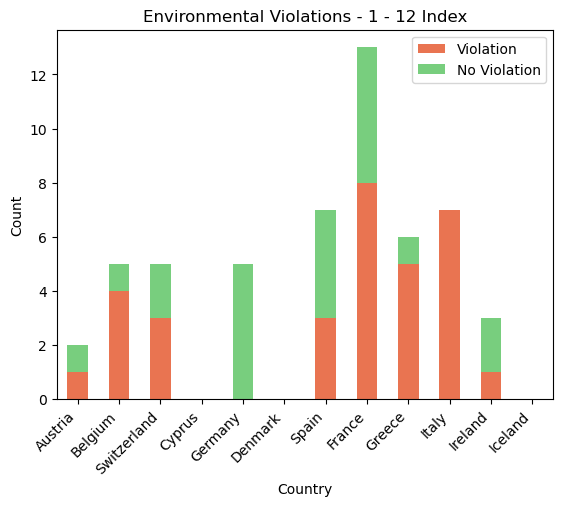

<Figure size 1000x800 with 0 Axes>

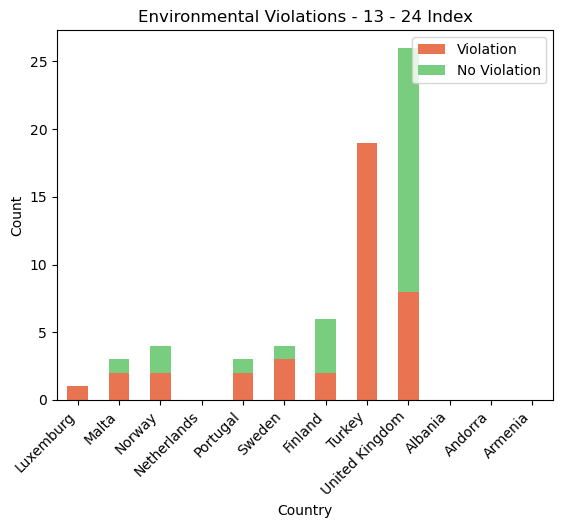

<Figure size 1000x800 with 0 Axes>

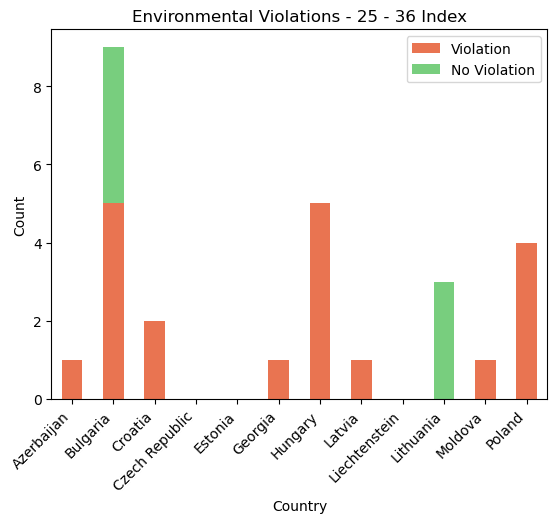

<Figure size 1000x800 with 0 Axes>

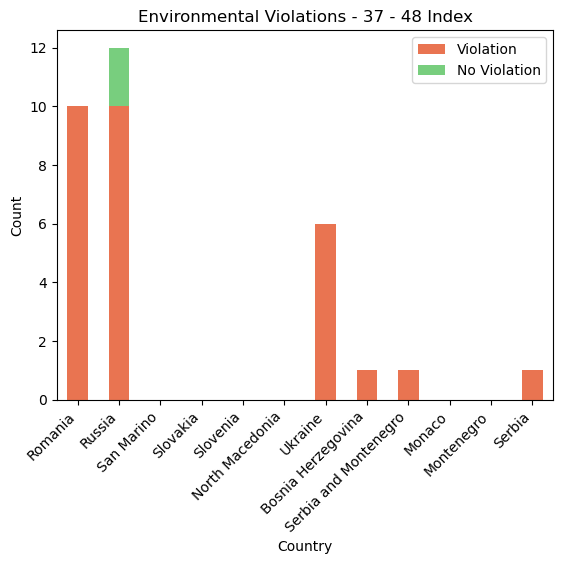

<Figure size 1000x800 with 0 Axes>

In [30]:
def plot_stacked_bar(df, title):
    df.set_index('Country')[['Violation', 'No Violation']].plot(kind='bar', stacked=True,  color=['#E97451', '#78CE7E'])  # N/A Column not Included
        
    plt.title(title)
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='upper right')
    plt.figure(figsize=(10, 8))

    plt.show()


plot_stacked_bar(results_df_1, 'Environmental Violations - 1 - 12 Index')
plot_stacked_bar(results_df_2, 'Environmental Violations - 13 - 24 Index')
plot_stacked_bar(results_df_3, 'Environmental Violations - 25 - 36 Index')
plot_stacked_bar(results_df_4, 'Environmental Violations - 37 - 48 Index')

## Plotly Theme (Interactive)

In [31]:
import plotly.express as px
import pandas as pd


def plot_stacked_bar_plotly(df, title):
    df_melted = df.melt(id_vars=['Country'], value_vars=['Violation', 'No Violation'],
                        var_name='Violation Type', value_name='Count')
    
    fig = px.bar(df_melted, x='Country', y='Count', color='Violation Type', title=title,
                 labels={'Count': 'Count', 'Country': 'Country'},
                 barmode='stack', text='Count')
    
    fig.update_layout(xaxis={'categoryorder':'total descending'}, 
                      xaxis_tickangle=-45, 
                      title={'text': title, 'x':0.5})
    fig.show()

# Plotting with Plotly
plot_stacked_bar_plotly(results_df_1, 'Environmental Violations - 1 - 12 Index')
plot_stacked_bar_plotly(results_df_2, 'Environmental Violations - 13 - 24 Index')
plot_stacked_bar_plotly(results_df_3, 'Environmental Violations - 25 - 36 Index')
plot_stacked_bar_plotly(results_df_4, 'Environmental Violations - 37 - 48 Index')

## Scatterplot

In [32]:
results_df_scope['Total'] = results_df_scope['Violation'] + results_df_scope['No Violation']
results_df_scope['Violation Percentage'] = results_df_scope['Violation'] / results_df_scope['Total']
results_df_scope



,Country,Violation,No Violation,N/A,Total,Violation Percentage
1,Austria,1,1,17,2,0.500000
2,Belgium,4,1,90,5,0.800000
3,Switzerland,3,2,52,5,0.600000
4,Cyprus,0,0,0,0,NaN
5,Germany,0,5,52,5,0.000000
6,Denmark,0,0,0,0,NaN
7,Spain,3,4,107,7,0.428571
8,France,8,5,291,13,0.615385
9,Greece,5,1,165,6,0.833333
10,Italy,7,0,107,7,1.000000


In [33]:
fig = px.scatter(results_df_scope, x="Total", y="Violation Percentage", hover_name="Country", title="Percentage of Violations Over Total")
fig.update_traces(textposition='top center')
fig.show()